# NSW PART-TIME JOB ANALYSIS
Word Done as part of the NSW Govt. virtual internship

## About The Data



Glossary:

Sector or Public Sector	 : The term for the collective Agencies/people who directly work for the NSW State Government

Cluster	: A group of agencies that share a common function and report to a secretary

Headcount :	The number of employees

pp :	Percentage Point

Tips: 
Break each part of the request down to its data parts, label each part, and then work on the parts separately before combining them into a data narrative

The two attached sheets contain the same data: the first sheet presents the data in a table, while the second presents data in a format suitable for analysis using a PivotTable

Don't merge cells, it makes an excel file non-accessible to people with disabilities who use screen reader programs

## Tasks

You have been asked to prepare analysis on part-time employees to brief your Director prior to a meeting they are attending with the Workforce Diversity Steering Committee to review whether part-time employment arrangements are increasing.

Please provide:

•Trends over time in male and female employment, including any notable changes

•The current representation of part time employees in the sector and in each Cluster

•The current representation of male and female part time employees as a proportion of the respective male and the female workforce in the sector and in each cluster

•Change in these two above statistics over the last 4 years

•Projection of what the representation will be by 2025 if the current trends continue

Part 2:

Please prepare a discussion paper (maximum 4 A4 pages of content or 6 presentation slides) of your analysis that would be suitable for a Director to use as a discussion aid in a meeting with senior executives. You must include tables or charts that illustrate your findings.

“This work has the potential to influence the direction of a sector wide target, so it needs to be of the highest quality ...”

In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px  black solid !important;
  color: black !important;
}
</style>

In [262]:
data = pd.read_csv('data.csv')
data = data.replace(',','', regex=True)
data = data.astype({'Headcount':int})

In [263]:
data.head()

,Cluster,Agency,Year,PT/FT,Gender,Headcount
0,Education,Education Agency 1,2014,Full-Time,Female,180
1,Education,Education Agency 2,2014,Full-Time,Female,2463
2,Education,Education Agency 3,2014,Full-Time,Female,32
3,Education,Education Agency 4,2014,Full-Time,Female,39251
4,Family & Community Services,Family & Community Services Agency 1,2014,Full-Time,Female,9817


In [264]:
print('Clusters : ',data['Cluster'].unique())
print('Years : ' , data['Year'].unique())
print('Job Type :' , data['PT/FT'].unique())
print('Gender :', data['Gender'].unique())

Clusters :  ['Education' 'Family & Community Services' 'Finance Services & Innovation'
 'Health' 'Industry' 'Justice' 'Planning & Environment'
 'Premier & Cabinet' 'Transport' 'Treasury']
Years :  [2014 2015 2016 2017 2018]
Job Type : ['Full-Time' 'Part-Time']
Gender : ['Female' 'Male']


In [265]:
data.describe()

,Year,Headcount
count,1840.000000,1840.000000
mean,2016.000000,1028.171739
std,1.414598,3003.876102
min,2014.000000,5.000000
25%,2015.000000,20.000000
50%,2016.000000,113.500000
75%,2017.000000,746.250000
max,2018.000000,41521.000000


In [266]:
maledata = data[data['Gender']=='Male']

In [267]:
maledata.head()

,Cluster,Agency,Year,PT/FT,Gender,Headcount
92,Education,Education Agency 1,2014,Full-Time,Male,107
93,Education,Education Agency 2,2014,Full-Time,Male,2797
94,Education,Education Agency 3,2014,Full-Time,Male,6
95,Education,Education Agency 4,2014,Full-Time,Male,16463
96,Family & Community Services,Family & Community Services Agency 1,2014,Full-Time,Male,3803


In [268]:
femaledata = data[data['Gender']=='Female']

In [269]:
femaledata.head()

,Cluster,Agency,Year,PT/FT,Gender,Headcount
0,Education,Education Agency 1,2014,Full-Time,Female,180
1,Education,Education Agency 2,2014,Full-Time,Female,2463
2,Education,Education Agency 3,2014,Full-Time,Female,32
3,Education,Education Agency 4,2014,Full-Time,Female,39251
4,Family & Community Services,Family & Community Services Agency 1,2014,Full-Time,Female,9817


In [270]:
ft_maledata = maledata[maledata['PT/FT']=='Full-Time']
pt_maledata = maledata[maledata['PT/FT']=='Part-Time']
ft_femaledata = femaledata[femaledata['PT/FT']=='Full-Time']
pt_femaledata = femaledata[femaledata['PT/FT']=='Part-Time']

## Trends over time in male and female employment, including any notable changes

In [271]:
trend_ftmaledata = ft_maledata.groupby(['Year'], as_index = False)['Headcount'].sum()

In [272]:
trend_ftmaledata

,Year,Headcount
0,2014,123614
1,2015,118504
2,2016,117976
3,2017,114962
4,2018,111377


In [273]:
trend_ftfemaledata = ft_femaledata.groupby(['Year'], as_index = False)['Headcount'].sum()

In [274]:
trend_ftfemaledata

,Year,Headcount
0,2014,156793
1,2015,152038
2,2016,154489
3,2017,155408
4,2018,155833


In [275]:
trend_ptmaledata = pt_maledata.groupby(['Year'], as_index = False)['Headcount'].sum()

In [276]:
trend_ptmaledata

,Year,Headcount
0,2014,13995
1,2015,14302
2,2016,14678
3,2017,18706
4,2018,22034


In [277]:
trend_ptfemaledata = pt_femaledata.groupby(['Year'], as_index = False)['Headcount'].sum()

In [278]:
trend_ptfemaledata

,Year,Headcount
0,2014,87983
1,2015,89943
2,2016,88264
3,2017,90721
4,2018,90216


In [279]:
trendforft = trend_ftmaledata.merge(trend_ftfemaledata, on="Year", left_index=True, right_index=True)
#trendforft.set_index('Year', inplace=True)
trendforft.columns=['Year','Male','Female']

In [280]:
trendforft

,Year,Male,Female
0,2014,123614,156793
1,2015,118504,152038
2,2016,117976,154489
3,2017,114962,155408
4,2018,111377,155833


In [281]:
trendforpt = trend_ptmaledata.merge(trend_ptfemaledata, on="Year", left_index=True, right_index=True)
#trendforpt.set_index('Year', inplace=True)
trendforpt.columns=['Year','Male','Female']

In [282]:
trendforpt

,Year,Male,Female
0,2014,13995,87983
1,2015,14302,89943
2,2016,14678,88264
3,2017,18706,90721
4,2018,22034,90216


Headcount_x = male | 
Headcount_y = female

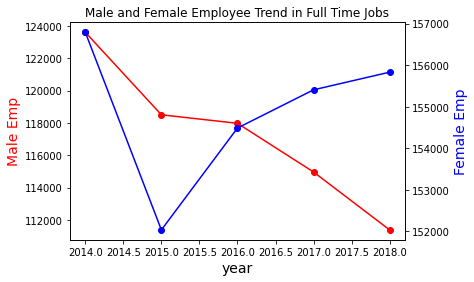

In [283]:
fig,ax = plt.subplots()
# make a plot
ax.plot(trendforft['Year'], trendforft['Male'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Male Emp",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(trendforft['Year'], trendforft['Female'],color="blue",marker="o")
ax2.set_ylabel("Female Emp",color="blue",fontsize=14)
plt.title('Male and Female Employee Trend in Full Time Jobs')
plt.show()


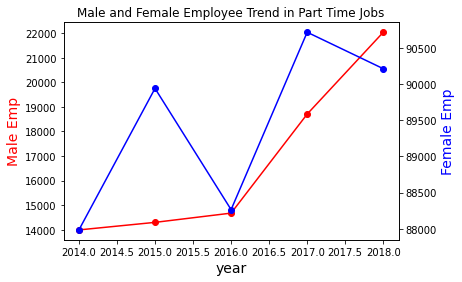

In [284]:
fig,ax = plt.subplots()
# make a plot
ax.plot(trendforpt['Year'], trendforpt['Male'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("year",fontsize=14)
# set y-axis label
ax.set_ylabel("Male Emp",color="red",fontsize=14)
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(trendforpt['Year'], trendforpt['Female'],color="blue",marker="o")
ax2.set_ylabel("Female Emp",color="blue",fontsize=14)
plt.title('Male and Female Employee Trend in Part Time Jobs')
plt.show()

# The current representation of part time employees in the sector and in each Cluster

In [289]:
curr_rep = data[(data['Year']==2018) & (data['PT/FT']=='Part-Time')]

In [290]:
curr_rep = curr_rep.groupby('Cluster')['Headcount'].sum()

In [291]:
curr_rep = curr_rep.to_frame()
curr_rep = curr_rep.reset_index()
curr_rep.columns = ['Cluster','Count'] 

In [292]:
curr_rep

,Cluster,Count
0,Education,47939
1,Family & Community Services,1512
2,Finance Services & Innovation,2058
3,Health,48500
4,Industry,813
5,Justice,5021
6,Planning & Environment,1553
7,Premier & Cabinet,363
8,Transport,4343
9,Treasury,148


Text(0.5, 0, 'Count')

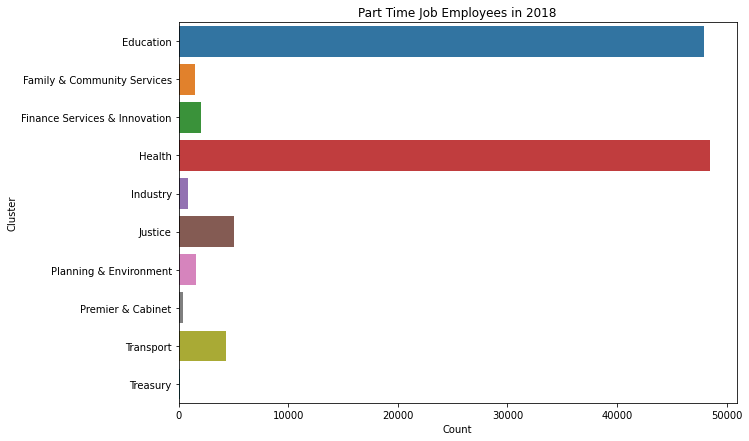

In [293]:
ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(x='Count', y='Cluster', data=curr_rep)
ax.set_title("Part Time Job Employees in 2018")
ax.set_xlabel('Count')

In [294]:
print("Total number of part time emloyees in the year 2018 : ", curr_rep['Count'].sum())

Total number of part time emloyees in the year 2018 :  112250


#  The current representation of male and female part time employees as a proportion of the respective male and the female workforce in the sector and in each cluster

In [295]:
ptcluster_male = pt_maledata[pt_maledata['Year'] == 2018]
ptcluster_male = ptcluster_male.groupby(['Cluster'])['Headcount'].sum()

In [296]:
ptcluster_male = ptcluster_male.to_frame()
ptcluster_male = ptcluster_male.reset_index()
ptcluster_male.columns = ['Cluster', 'Count']
ptcluster_male

,Cluster,Count
0,Education,8783
1,Family & Community Services,113
2,Finance Services & Innovation,690
3,Health,7498
4,Industry,114
5,Justice,1447
6,Planning & Environment,302
7,Premier & Cabinet,71
8,Transport,2998
9,Treasury,18


In [318]:
ptcluster_female = pt_femaledata[pt_femaledata['Year'] == 2018]
ptcluster_female = ptcluster_female.groupby('Cluster')['Headcount'].sum()

In [319]:
ptcluster_female = ptcluster_female.to_frame()
ptcluster_female = ptcluster_female.reset_index()
ptcluster_female.columns = ['Cluster', 'Count']
ptcluster_female

,Cluster,Count
0,Education,39156
1,Family & Community Services,1399
2,Finance Services & Innovation,1368
3,Health,41002
4,Industry,699
5,Justice,3574
6,Planning & Environment,1251
7,Premier & Cabinet,292
8,Transport,1345
9,Treasury,130


In [299]:
parttime_male = ptcluster_male['Count'].sum()
parttime_female = ptcluster_female['Count'].sum()

pt_df = {
    'Gender' : ['Male','Female'],
    'Part-Time Count (2018)' : [parttime_male,parttime_female],
    'Percent' : [parttime_male/(parttime_female+parttime_male)*100,parttime_female/(parttime_female+parttime_male)*100]
}

MvF = pd.DataFrame(data = pt_df)
MvF.style.hide_index()


Gender,Part-Time Count (2018),Percent
Male,22034,19.6294
Female,90216,80.3706


Text(0.5, 0, 'Count')

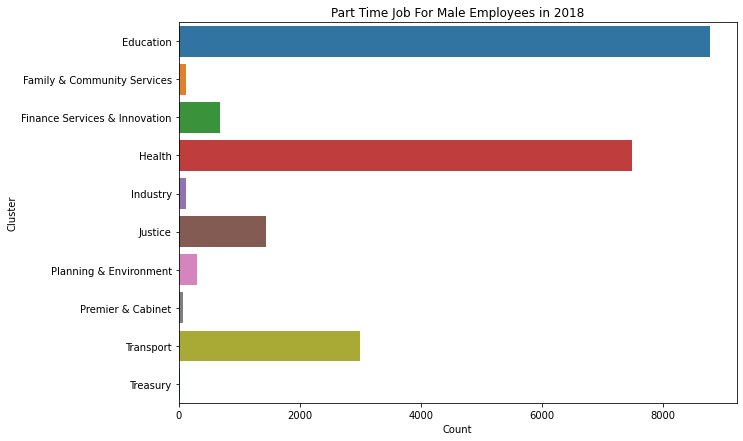

In [300]:
ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(x='Count', y='Cluster', data=ptcluster_male)
ax.set_title("Part Time Job For Male Employees in 2018")
ax.set_xlabel('Count')

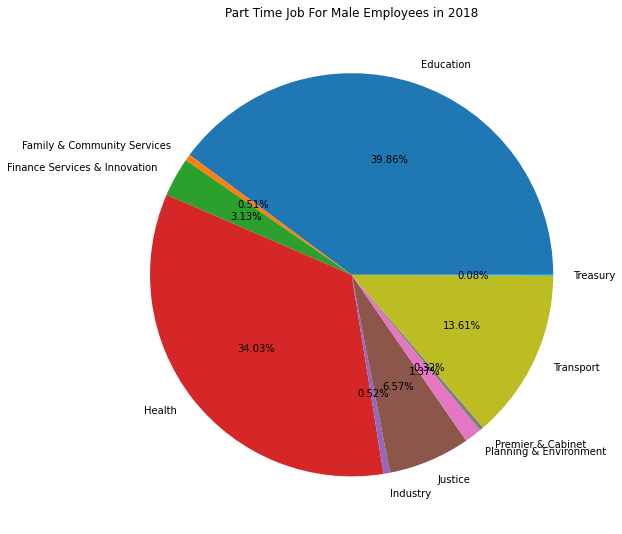

In [301]:
from matplotlib import pyplot as plt
import numpy as np
count = ptcluster_male['Count']
cluster = ptcluster_male['Cluster']
fig = plt.figure(figsize=(7,7))
ax = fig.add_axes([1,1,1,1])
ax.set_title("Part Time Job For Male Employees in 2018")
ax.pie(count, labels = cluster,autopct='%1.2f%%')
plt.show()

Text(0.5, 0, 'Count')

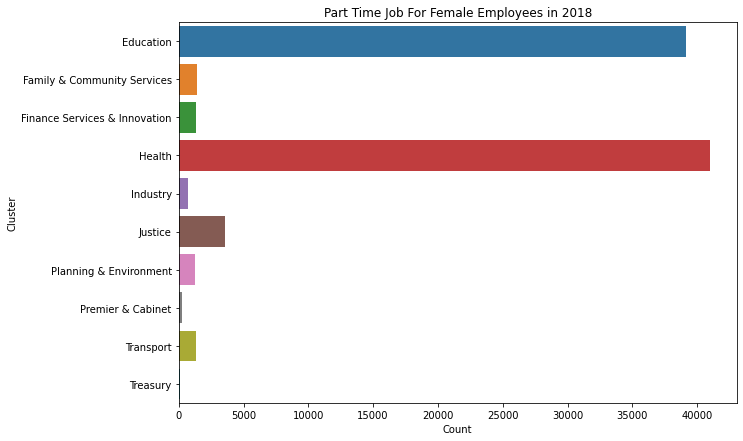

In [302]:
ax = plt.subplots(figsize=(10, 7))
ax = sns.barplot(x='Count', y='Cluster', data=ptcluster_female)
ax.set_title("Part Time Job For Female Employees in 2018")
ax.set_xlabel('Count')

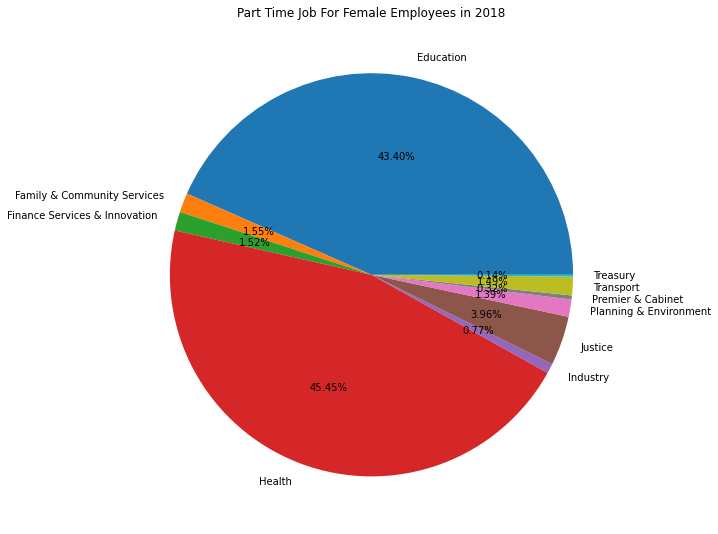

In [303]:
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure(figsize=(7,7))
count = ptcluster_female['Count']
cluster = ptcluster_female['Cluster']
ax = fig.add_axes([0,0,1,1])
ax.set_title("Part Time Job For Female Employees in 2018")
ax.pie(count, labels = cluster,autopct='%1.2f%%')
plt.show()

# Representation of Male, Female Part-Time Employees: Trends, Forecast¶


## Change in these two above statistics over the last 4 years


In [330]:
testdf = data[data['PT/FT']=='Part-time']
testdf = data.groupby(['Cluster','Year','Gender'],as_index=False)['Headcount'].sum()
testdf2 = testdf[testdf['Year']==2018]
testdf2 = testdf2.groupby(['Cluster','Gender'],as_index=False)['Headcount'].sum()

In [331]:
testdf2

,Cluster,Gender,Headcount
0,Education,Female,83603
1,Education,Male,24851
2,Family & Community Services,Female,8267
3,Family & Community Services,Male,2409
4,Finance Services & Innovation,Female,5062
5,Finance Services & Innovation,Male,3456
6,Health,Female,108662
7,Health,Male,37650
8,Industry,Female,6438
9,Industry,Male,5764


In [332]:
testdf

,Cluster,Year,Gender,Headcount
0,Education,2014,Female,77475
1,Education,2014,Male,24256
2,Education,2015,Female,78006
3,Education,2015,Male,23424
4,Education,2016,Female,81406
...,...,...,...,...
95,Treasury,2016,Male,716
96,Treasury,2017,Female,828
97,Treasury,2017,Male,550
98,Treasury,2018,Female,917


In [333]:
statsdf = pd.DataFrame(columns=['Cluster','Male','Female','% Male','% Female'])
clusters = testdf['Cluster'].unique()

In [334]:
n=0
nn=0
for i in range(len(data['Cluster'].unique())):
    for j in range(1):
        if int(testdf.iloc[n,3:4]) < int(testdf.iloc[n+8,3:4]):
            statsdf.loc[i,0:1] = clusters[nn]
            statsdf.loc[i,2:3] = 'Increasing'

        else:
            statsdf.loc[i,0:1] = clusters[nn]
            statsdf.loc[i,2:3] = 'Decreasing'

        
        if int(testdf.iloc[n+1,3:4]) < int(testdf.iloc[n+9,3:4]):
                statsdf.loc[i,1:2] = 'Increasing'
        else:
                statsdf.loc[i,1:2] = 'Decreasing'
    n = n + 10 
    nn=nn+1

p=0
n=1
k=0
for i in range(10):
    for j in range(1):
        statsdf.loc[p,4:5] = int(testdf2.iloc[k,2:3])/int(testdf2.iloc[k,2:3]+testdf2.iloc[k+n,2:3])*100
        statsdf.loc[p,3:4] = int(testdf2.iloc[k+n,2:3])/int(testdf2.iloc[k,2:3]+testdf2.iloc[k+n,2:3])*100
    p=p+1
    #n=n+1
    k=k+2


In [335]:
statsdf

,Cluster,Male,Female,% Male,% Female
0,Education,Increasing,Increasing,22.9139,77.0861
1,Family & Community Services,Decreasing,Decreasing,22.5646,77.4354
2,Finance Services & Innovation,Decreasing,Increasing,40.5729,59.4271
3,Health,Increasing,Increasing,25.7327,74.2673
4,Industry,Decreasing,Decreasing,47.2382,52.7618
5,Justice,Increasing,Increasing,60.0509,39.9491
6,Planning & Environment,Increasing,Increasing,53.7316,46.2684
7,Premier & Cabinet,Increasing,Increasing,40.2847,59.7153
8,Transport,Increasing,Increasing,75.8158,24.1842
9,Treasury,Decreasing,Decreasing,39.6313,60.3687


In [310]:
sectorchange = data[data['PT/FT']=='Part-time']
sectorchange = data.groupby(['Cluster','Year'],as_index=False)['Headcount'].sum()
sectorchange.columns = ['Cluster','Year','Headcount']

In [311]:
sectorchange

,Cluster,Year,Headcount
0,Education,2014,101731
1,Education,2015,101430
2,Education,2016,105238
3,Education,2017,106928
4,Education,2018,108454
5,Family & Community Services,2014,20656
6,Family & Community Services,2015,20351
7,Family & Community Services,2016,15885
8,Family & Community Services,2017,15514
9,Family & Community Services,2018,10676


In [312]:
change_df = {
    'Sector' : ['Education', 'Family & Community Services','Finance Services & Innovation', 'Health', 'Industry', 'Justice','Planning & Environment', 'Premier & Cabinet', 'Transport','Treasury'],
    '% Men ' : []
}

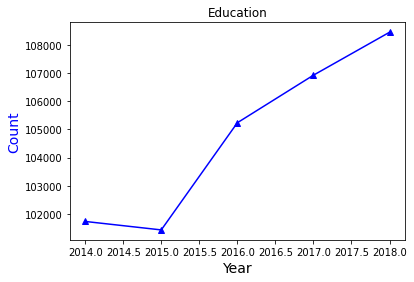

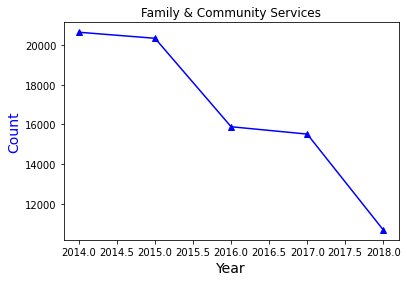

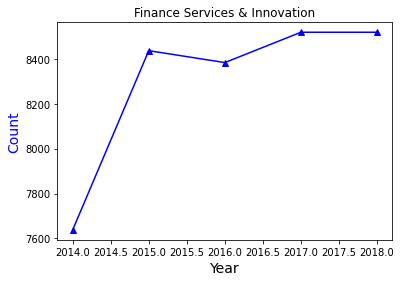

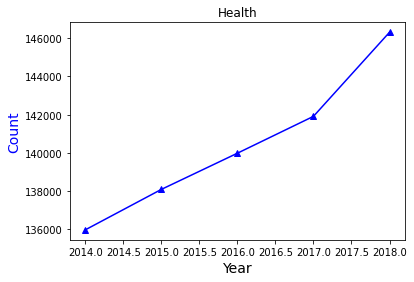

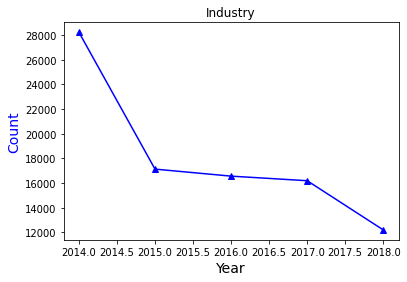

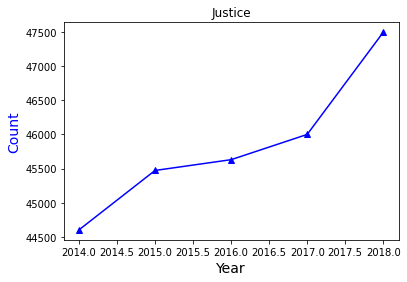

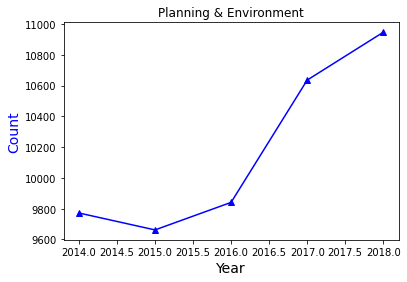

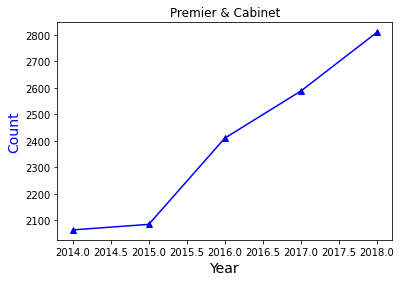

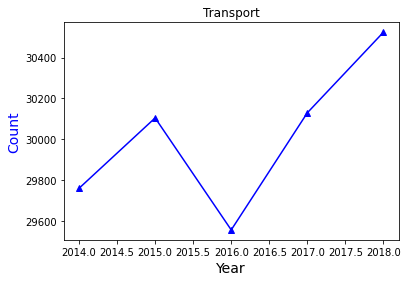

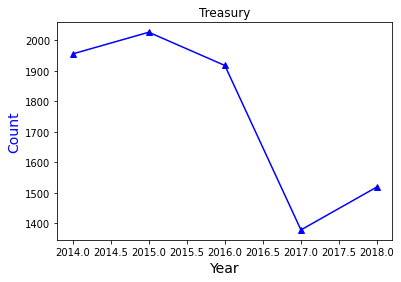

In [313]:
#Change in part-time over the last couple of years
n=0
for sectors in range(len(sectorchange.Cluster.unique())):
        display_df = sectorchange.loc[n:n+4]
        fig,ax = plt.subplots()
        ax.plot(display_df['Year'], display_df['Headcount'], color='blue', marker="^")
        ax.set_xlabel("Year",fontsize=14)
        ax.set_ylabel('Count',color='blue',fontsize=14)
        t = display_df['Cluster'].unique()
        t = listToStr = ' '.join([str(elem) for elem in t]) 
        plt.title(t)
        
        n=n+5


In [314]:
display_df = sectorchange.loc[0:4]
display_df

,Cluster,Year,Headcount
0,Education,2014,101731
1,Education,2015,101430
2,Education,2016,105238
3,Education,2017,106928
4,Education,2018,108454


## Predictions

In [315]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [316]:
data_frame_list = [trend_ftmaledata,trend_ftfemaledata,trend_ptmaledata,trend_ptfemaledata]
future_years = [2019,2020,2021,2022,2023,2024,2025]
titles = ["Fulltime Male Employee Prediction","Fulltime Female Employee Prediction","Part-time Male Employee Prediction","Part-time Female Employee Prediction"]

C:\Users\deepc\Anaconda3\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:221: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)


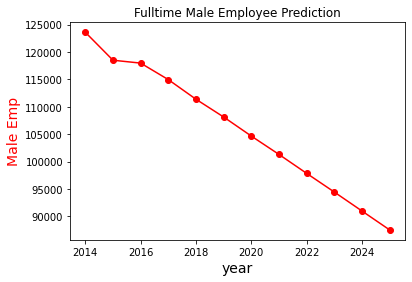

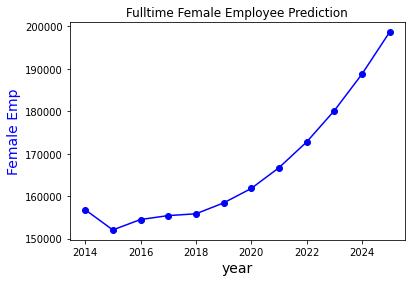

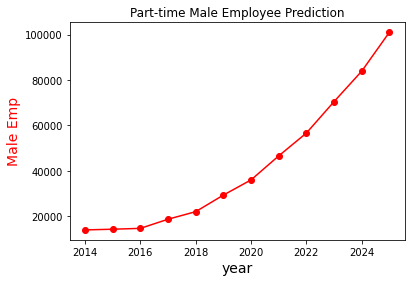

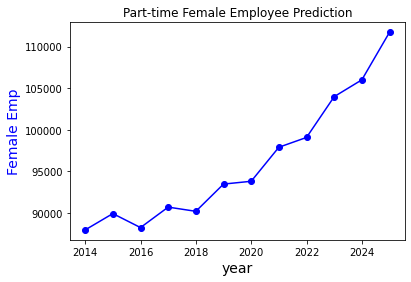

In [317]:
f=0
for i in range(0,4):
    df = 0
    counts = 0
    df = data_frame_list[i]
    counts = df['Headcount'].to_list()
    model_arima=ARIMA(counts,(1,2,0))
    model_arima_fit=model_arima.fit()
    prediction_arima=model_arima_fit.forecast(7)[0]
    #print(prediction_arima)
    n = 1
    for k in range(len(future_years)):
        df.loc[4+n,'Year'] = future_years[k]
        df.loc[4+n,'Headcount'] = int(prediction_arima[k])
        n=n+1
    #print(df)
    if(f%2==0):
        gen = 'Male'
        col = "red"
    else:
        gen = 'Female'
        col = "blue"
    fig,ax = plt.subplots()
    ax.plot(df['Year'], df['Headcount'], color=col, marker="o")
    ax.set_xlabel("year",fontsize=14)
    ax.set_ylabel(gen + " "+ "Emp",color=col,fontsize=14)
    plt.title(titles[i])
    f=f+1
